<a href="https://colab.research.google.com/github/shidsa6/Deutsch-Josza-project/blob/main/Assignment%203%20-%20Cosmic%20ray%20muons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Shidsa Pourbakhsh__
<br>
Due date: Jan. 28, 2024, 11:59pm
<br>
PHYS 2030 W25


# <center><font color=#46769B>Homework assignment 3</font></center>

__Rubric (100 points total)__:

- Problem 1 - __20 points__
     
- Problem 2 - __20 points__

- Problem 3 - __20 points__
     
- Problem 4 - __20 points__

- Problem 5 - __20 points__

</font>

## <font color=#46769B>Introduction:</font>

The __muon__ (labeled $\mu$) is an elementary particle that is similar to the electron, except it is about 200 times heavier and is unstable to radioactive decay. The lifetime of the muon is $\tau = 2.2\times 10^{-6}$ seconds, which means that a typical muon survives only a small fraction of a second after being produced, ultimately decaying into an electron and neutrinos. (For the curious reader, more information about muons can be found [here](https://en.wikipedia.org/wiki/Muon).)

One natural source of muons is high-energy cosmic rays. The cosmic rays are fast-moving protons and heavier elements. When they smash into the Earth's atmosphere, the collisions produce showers of particles, including muons.

Despite their short lifetimes, many cosmic ray muons reach the surface of the Earth. In fact, many high-energy muons are able to penetrate a good distance into the Earth, which is the reason why some experiments need to be done at laboratories [deep underground](https://en.wikipedia.org/wiki/SNOLAB). On the other hand, cosmic ray muons can also be very useful, allowing us to see places that are inaccessible.
Measuring how cosmic ray muons are absorbed (similar to taking an x-ray) allowed researchers to discover new hidden spaces in the Great Pyramid of Giza, a technique known as [muon tomography](https://www.livescience.com/56510-photos-inside-great-pyramid-giza.html).

In this assignment, you will perform a Monte Carlo simulation for cosmic ray muons (extending what you did in exercise 3). This is also an example of a __multivariate__ simulation, i.e., sampling multiple variables within the same problem. Here we assume that the variables are *uncorrelated*, meaning that they are sampled independently from one another.

Our goals for this notebook are:
- Perform a multivariate Monte Carlo simulation, tying together all the knowledge gained so far in the course
- Gain further experience in the inverse CDF method

Required reading:
- *Lesson 3: Sampling from arbitrary distributions*

## <font color=#46769B>Problem 1: Chain rule for sampling</font>

In Exercise 3, we sampled the projected radius $s$ from a distribution

$$P_s(s) = \left\{ \begin{array}{cc} \frac{2 s}{R^2} & {\rm for} \; 0 \le s \le R \\ 0 & {\rm otherwise} \end{array} \right. \, .\qquad {\rm (1)}$$

and then obtained samples for the cosmic ray angle $\theta$ according to the formula $\theta = \sin^{-1}(s/R)$.

Your first task is to repeat some steps of Exercise 3, Part (a):

- Generate samples for $s$ from $P_s(s)$, using the inverse CDF method. From this, obtain samples for $\theta$ *in radians*. Assign your $\theta$ samples to a variable `theta_samples_1`. Plot a histogram of `theta_samples_1`.

Next, we will find the PDF for $\theta$, $P_\theta(\theta)$, by applying the chain rule. The chain rule for PDFs (see Lesson 1 notes) says that

$$P_\theta(\theta) = P_s(s(\theta)) \, \frac{ds}{d\theta} \qquad (2)$$

where $s(\theta) = R \sin \theta$.

Your tasks are as follows:

- From Eqs. (1) and (2), determine $P_\theta(\theta)$. (Note: as $P_s(s)$ is only nonzero for $0 < s < R$, the new PDF $P_\theta(\theta)$ is only nonzero for $0 < \theta < \frac{\pi}{2}$.)

- Generate $N = 10^6$ samples for $\theta$ by sampling $P_\theta$ using the inverse CDF method. Define your inverse CDF function $C_\theta^{-1}$ to be `C_theta_inverse(r)` using a `def` statement.

- Assign your samples for $\theta$ to a variable `theta_samples_2` and plot a histogram of `theta_samples_2`.

- Plot a line for the PDF $P_\theta(\theta)$.

Note: Put all your plots together in one figure, setting `alpha=0.5` and `density=True` so that (hopefully) you can see that both histograms and your PDF plot all agree. Include a legend and $x$-axis label.



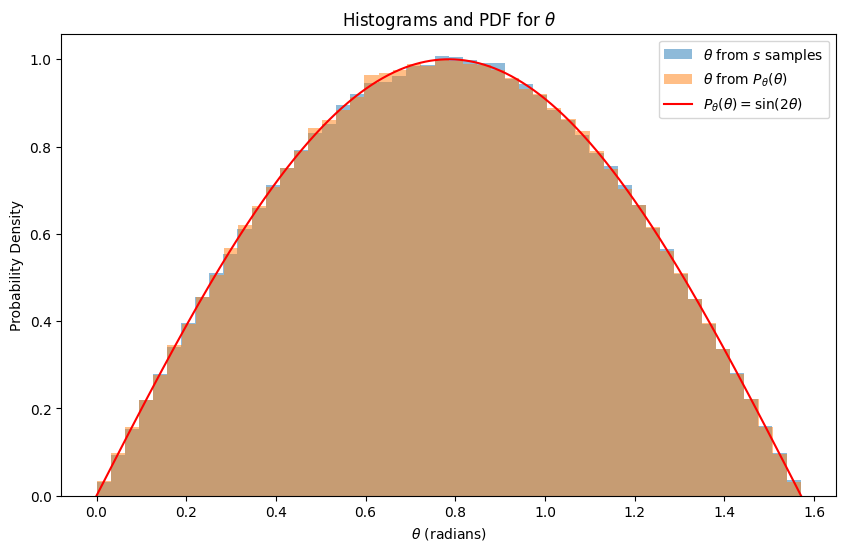

In [53]:
### Code for problem (1) here (keep this comment here) ###

import numpy as np
import matplotlib.pyplot as plt

R = 1.0
N = 10**6

r = np.random.rand(N)
s_samples = R * np.sqrt(r)
theta_samples_1 = np.arcsin(s_samples / R)

def C_theta_inverse(r):
    return 0.5 * np.arccos(1 - 2 * r)

r_theta = np.random.rand(N)
theta_samples_2 = C_theta_inverse(r_theta)

plt.figure(figsize=(10, 6))
plt.hist(theta_samples_1, bins=50, alpha=0.5, density=True, label=r'$\theta$ from $s$ samples')
plt.hist(theta_samples_2, bins=50, alpha=0.5, density=True, label=r'$\theta$ from $P_\theta(\theta)$')

theta_values = np.linspace(0, np.pi/2, 1000)
P_theta = np.sin(2 * theta_values)
plt.plot(theta_values, P_theta, 'r-', label=r'$P_\theta(\theta) = \sin(2\theta)$')

plt.xlabel(r'$\theta$ (radians)')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Histograms and PDF for $\\theta$')
plt.show()


## <font color=#46769B>Problem 2: Cosmic ray muons, revisited</font>

Here you are to repeat some steps from Exercise 3, in particular, to help you make sense out of the results of Part (c).

Suppose a cosmic ray impacts the atmosphere at height $h$ and with angle $\theta$, creating a muon which travels in the same direction. The muon travels a distance $d = c t$ before it decays, where $t$ is the time it takes to decay. The muon is assumed to travel at the speed of light, $c = 3 \times 10^5 \; {\rm km/s}$.

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/Cosmic-ray-fig-3.png" width="800">
</div>

With some geometry, the height above the Earth's surface where the muon decays is

$$z = h - ct \cos\theta \qquad (3)$$

Here we will *not* assume that $h$ is a fixed number, but we will allow for some uncertainty by sampling $h$ from a normal distribution.

Your tasks are as follows:

- Generate $N=10^6$ samples for each of the following quantities:

    - $\theta$, in radians, either by sampling from $P_\theta(\theta)$ as in Problem 1, or using $P_s(s)$ as in Exercise 3. Assign your $theta$ samples to a variable `theta_samples`.
    
    - $t$, by sampling from an exponential distribution as in Exercise 3. Assign your $t$ samples to a variable `t_samples`.
    
    - $h$ by sampling from a normal distribution, $\mathcal{N}(15 \; {\rm km}, 2 \; {\rm km})$. Assign your $h$ samples to a variable `h_samples`.

- Using your samples and Eq. (3), obtain samples for $z$ in units of ${\rm km}$, assigned to a variable `z_samples`.

- Make a histogram for $z$ that *only covers the region* $z > 0$ above the Earth's surface. The best way to do this is to by setting the `bins` in histogram to cover that region. Here is how:
```py
plt.hist(z,bins=np.linspace(0,25,30))
```
This sets the bin edges to be points in the `linspace`, e.g., 30 bins that go from $[0,25]$. Also, use a log-scale for the $y$-axis.

- Calculate and print the *percentage* of muons that reach the Earth's surface. Assign this number to a variable `percent_surface`.

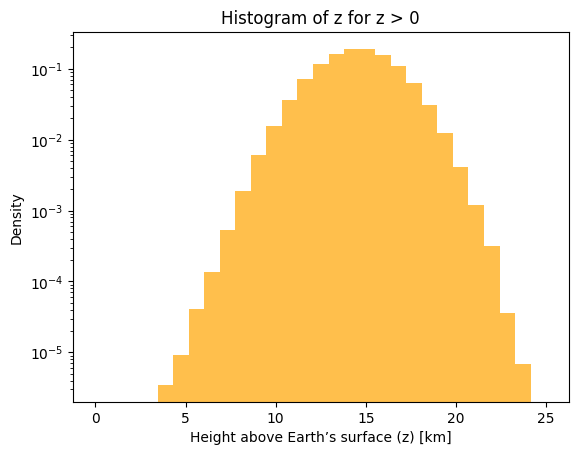

Percentage of muons that reach the Earth's surface: 0.0000%


In [55]:
### Code for problem (2) here (keep this comment here) ###

import numpy as np
import matplotlib.pyplot as plt

c = 3e5
N = 10**6
mean_h = 15
std_h = 2
tau = 2.2e-6

r = np.random.rand(N)
theta_samples = np.arcsin(np.sqrt(r))
cos_theta = np.cos(theta_samples)

t_samples = np.random.exponential(scale=tau, size=N)
d_samples = c * t_samples

h_samples = np.random.normal(loc=mean_h, scale=std_h, size=N)
z_samples = h_samples - d_samples * cos_theta

plt.hist(z_samples[z_samples > 0], bins=np.linspace(0, 25, 30), density=True, alpha=0.7, color="orange")
plt.xlabel("Height above Earth’s surface (z) [km]")
plt.ylabel("Density")
plt.yscale("log")
plt.title("Histogram of z for z > 0")
plt.show()

muons_reaching_surface = np.sum(z_samples <= 0)
percent_surface = 100 * muons_reaching_surface / N
print(f"Percentage of muons that reach the Earth's surface: {percent_surface:.4f}%")



my chat gpt chat for this section : https://chatgpt.com/share/67993229-49d0-8007-9c6b-e8efe951ef09

## <font color=#46769B>Problem 3: Cosmic ray muons, with time dilation</font>

Cosmic ray muons are travelling close to the speed of light $c$, so we have to account for *time dilation*, as per Einstein's theory of Special Relativity. The decay time $t$ is the muon's decay time *at rest*, i.e., in the rest frame of the muon. To an observer at rest on the Earth, the muon's decay time will be $\gamma t$, where

$$\gamma = \frac{E}{E_m}$$

is the [Lorentz factor](https://en.wikipedia.org/wiki/Lorentz_factor), where $E$ is the total muon energy (kinetic + rest energy) and $E_m = m c^2$ is the muon rest energy. We also have the muon velocity $v = c \sqrt{1 - E_m^2/E^2}$, which is close to $c$ for $E \gg E_m$.

Putting this all together, the distance traveled by the muon is

$$ d = v \gamma t = c t \frac{\sqrt{E^2 - E_m^2}}{E_m} \, . \qquad {\rm (4)}$$

Now, to obtain samples for $d$, we need to know the muon energy $E$. This is not a fixed number and we will assume that cosmic muons have a power-law distribution according to the following PDF

$$P_E(E) =
\left\{ \begin{array}{cc} E_m E^{-2} & {\rm for} \; E \ge E_m \\
0 & {\rm otherwise} \end{array} \right. \, .$$

Use the following numerical constants:
- Muon rest mass energy: $E_m = mc^2 = 0.106 \; {\rm GeV}$. (It is customary to measure the rest mass energy in units of GeV (giga-electron volts), instead of SI units (Joules).)
- Speed of light: $c = 3 \times 10^5 \;  {\rm km/s}$.

Here you are to repeat Problem 1 with taking in account time dilation. Your tasks are as follows. Taking $N=10^6$:

- Generate $N$ samples $E$ from $P_E(E)$ using the inverse CDF method. Define the inverse CDF $C_E^{-1}(r)$ as a function `C_E_inverse(r)` using a `def` statement. Assign your samples for $E$ to `E_samples`.

- Generate $N$ samples for $t$, $\theta$, $h$ as in Problem 1. Assign these to `t_samples`, `theta_samples`, and `h_samples`, respectively.

- Calculate $N$ samples for $d$ according to Eq. (4), in units of ${\rm km}$. Assign to `d_samples`.

- Calculate $N$ samples for $z$ according to Eq. (3), in units of ${\rm km}$. Assign to `z_samples_2`.

- Make a histogram of `z_samples_2` for $z > 0$ above the Earth's surface. On the same plot, include your histogram of `z_samples` from Problem 2. Set `alpha=0.5` and use a log-scale for the $y$-axis, but *do not* set `density=True` here. Include a legend and $x$-axis label.

- Calculate and print the fraction of muons that reach the Earth's surface. Assign this value to a variable `percent_surface_new`.

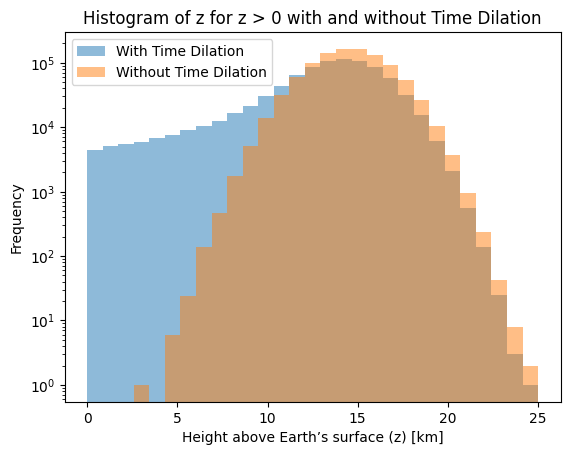

Percentage of muons that reach the Earth's surface with time dilation: 14.7844%


In [56]:
### Code for problem (3) here (keep this comment here) ###
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e5
N = 10**6
tau = 2.2e-6
E_m = 0.106
mean_h = 15
std_h = 2

def C_E_inverse(r):
    return E_m / (1 - r)  # Inverse CDF for power-law distribution

r_E = np.random.rand(N)
E_samples = C_E_inverse(r_E)

gamma = E_samples / E_m

r_theta = np.random.rand(N)
theta_samples = np.arcsin(np.sqrt(r_theta))
cos_theta = np.cos(theta_samples)

t_samples = np.random.exponential(scale=tau, size=N)
h_samples = np.random.normal(loc=mean_h, scale=std_h, size=N)

d_samples = c * gamma * t_samples * np.sqrt(E_samples**2 - E_m**2) / E_m

z_samples_2 = h_samples - d_samples * cos_theta

plt.hist(z_samples_2[z_samples_2 > 0], bins=np.linspace(0, 25, 30), alpha=0.5, label='With Time Dilation')
plt.hist(h_samples - (c * t_samples * cos_theta), bins=np.linspace(0, 25, 30), alpha=0.5, label='Without Time Dilation')
plt.xlabel("Height above Earth’s surface (z) [km]")
plt.ylabel("Frequency")
plt.yscale("log")
plt.title("Histogram of z for z > 0 with and without Time Dilation")
plt.legend()
plt.show()

muons_reaching_surface = np.sum(z_samples_2 <= 0)
percent_surface_new = 100 * muons_reaching_surface / N
print(f"Percentage of muons that reach the Earth's surface with time dilation: {percent_surface_new:.4f}%")


## <font color=#46769B>Problem (4): Cosmic ray observer</font>

Consider an observer on the surface of the Earth, who will detect the energy $E$ and angle $\theta$ of the muons. The goal here is to determine the distribution of $E$ and $\theta$ measured by the observer. Naturally, they are limited only to those muons that reach the surface.

Using your samples in Problems (3), your tasks are as follows:

- Plot the histogram for $E$ *for only muons that reach the surface*. On the sample plot, show the histogram for $E$ for *all samples*, as well as the original PDF for $E$. Be sure that you include labels, your histograms are normalized (`density=True`) and have `alpha=0.5`, and use log-log scales for your axes.

- Plot the histogram for $\theta$ *for only muons that reach the surface*. On the sample plot, show the histogram for $\theta$ for *all samples*, as well as the original PDF for $\theta$. Be sure that you include labels, your histograms are normalized (`density=True`) and have `alpha=0.5`, and use linear-linear scales for your axes.

You should find that the distributions of muons reaching the surface is skewed toward higher energies $E$ and smaller angles $\theta$, which makes sense since faster muons moving straight down are more likely to reach the surface.

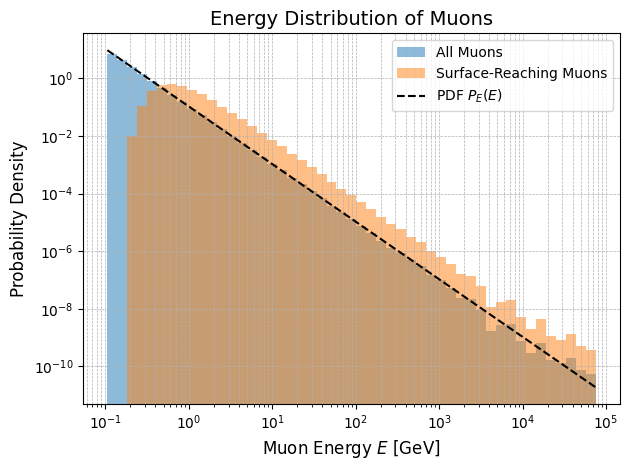

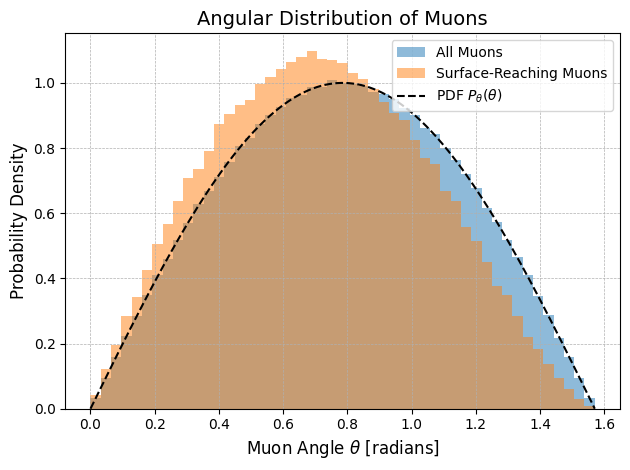

In [57]:
### Code for problem (4) here (keep this comment here) ###
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 3e5
N = 10**6
tau = 2.2e-6
E_m = 0.106
mean_h = 15
std_h = 2

def C_E_inverse(r):
    return E_m / (1 - r)

r_E = np.random.rand(N)
E_samples = C_E_inverse(r_E)
gamma = E_samples / E_m

r_theta = np.random.rand(N)
theta_samples = np.arcsin(np.sqrt(r_theta))
cos_theta = np.cos(theta_samples)

t_samples = np.random.exponential(scale=tau, size=N)
h_samples = np.random.normal(loc=mean_h, scale=std_h, size=N)
d_samples = c * gamma * t_samples * np.sqrt(E_samples**2 - E_m**2) / E_m
z_samples_2 = h_samples - d_samples * cos_theta

mask = z_samples_2 <= 0
E_surface = E_samples[mask]
theta_surface = theta_samples[mask]


# Energy Distribution
bins = np.logspace(np.log10(E_m), np.log10(E_samples.max()), 50)
plt.hist(E_samples, bins=bins, density=True, alpha=0.5, label="All Muons")
plt.hist(E_surface, bins=bins, density=True, alpha=0.5, label="Surface-Reaching Muons")
E_plot = np.logspace(np.log10(E_m), np.log10(E_samples.max()), 500)
P_E = E_m * E_plot**-2
plt.plot(E_plot, P_E, color="black", linestyle="--", label="PDF $P_E(E)$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Muon Energy $E$ [GeV]", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.title("Energy Distribution of Muons", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Angular Distribution
bins_theta = np.linspace(0, np.pi / 2, 50)
plt.hist(theta_samples, bins=bins_theta, density=True, alpha=0.5, label="All Muons")
plt.hist(theta_surface, bins=bins_theta, density=True, alpha=0.5, label="Surface-Reaching Muons")
theta_plot = np.linspace(0, np.pi / 2, 500)
P_theta = 2 * np.sin(theta_plot) * np.cos(theta_plot)
plt.plot(theta_plot, P_theta, color="black", linestyle="--", label="PDF $P_\\theta(\\theta)$")
plt.xlabel("Muon Angle $\\theta$ [radians]", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.title("Angular Distribution of Muons", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


## <font color=#46769B>Problem 5: Monte Carlo integration</font>

Now for something different.

Monte Carlo sampling is a useful tool for performing numerical integration. In this problem, we will show how this works in a simple context.

Let's consider the (definite) integral

$$I = \int_a^b dx \, f(x)$$

Note that the volume of integration is $V = \int_a^b dx = (b - a)$. Let's divide both sides by $V$:

$$\frac{I}{V} = \int_a^b dx \, \frac{1}{b-a} \, f(x) $$

Now, the factor of $1/(b-a)$ is nothing more than the PDF for a uniform distribution

$$P(x) = \left\{ \begin{array}{cc} \frac{1}{b-a} & a < x < b \\ 0 & {\rm otherwise} \end{array} \right.$$

So, we can express our integral as the mean of $f(x)$

$$\frac{I}{V} = \int_{-\infty}^{\infty} dx \, P(x) \, f(x) = \overline{f(x)}$$

which we can approximate as $\langle f(x) \rangle$ using Monte Carlo sampling. In summary, the integral we want to compute is approximated as

$$I = V \langle f(x) \rangle$$

which approaches the true value of $I$ in the limit $N \to \infty$.

Let's consider the integral:

$$I = \int_{-\pi/2}^{\pi/2} dx \, \frac{\sin x}{x} $$

Your task is as follows:

- Write a function `MC_integrate(num)` that uses Monte Carlo sampling to calculate $I$ and the error $E_I$, where `num` is the number of samples $N$. Your function should return both $I$ and $E_I$.

- Using your function, evaluate $I$ by choosing a large enough $N$ such that the error $E_I < 0.001$. Print your result for $I$ and $E_I$.

Hints:

- The error $E_I$ is calculated as $E_I = V E_{f(x)}$, where $E_{f(x)}$ is the standard error of the mean of $f(x)$ calculated from your samples, i.e., $E_{f(x)} = \Delta f(x)/\sqrt{N}$.

- This integral can be computed using a built-in function `scipy.special.sici` (see documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sici.html).) Feel free to use this as a cross-check that you have done the calculation correctly.



In [58]:
import numpy as np
import scipy.special as sp

def MC_integrate(num):
    a, b = -np.pi / 2, np.pi / 2
    x_samples = np.random.uniform(a, b, num)
    f_x = np.sinc(x_samples / np.pi)

    V = (b - a)
    I = V * np.mean(f_x)
    error = V * np.std(f_x) / np.sqrt(num)

    return I, error

target_error = 0.001
N = 10**4
I_est, E_I = MC_integrate(N)

while E_I > target_error:
    N *= 2
    I_est, E_I = MC_integrate(N)

I_exact = sp.sici(np.pi / 2)[0] - sp.sici(-np.pi / 2)[0]

print(f"Monte Carlo Estimate: I = {I_est:.6f}, Error = {E_I:.6f}, Samples Used = {N}")
print(f"Exact Value from SciPy: I = {I_exact:.6f}")
print(f"Absolute Difference: {abs(I_est - I_exact):.6f}")


Monte Carlo Estimate: I = 2.741986, Error = 0.000866, Samples Used = 160000
Exact Value from SciPy: I = 2.741524
Absolute Difference: 0.000462


My full chat with ai : https://chatgpt.com/share/67993229-49d0-8007-9c6b-e8efe951ef09